# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
#First, import all necessary libraries for data cleaning
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

color = sns.color_palette()
%matplotlib inline

### Question 1

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


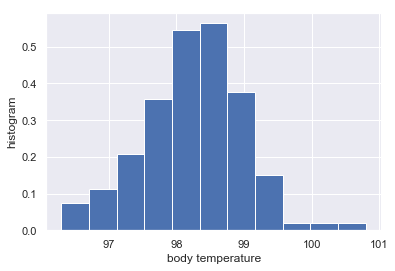

In [4]:
# Set default Seaborn style
sns.set()

# Compute number of data points: n_data
n_data=len(df.temperature)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot histogram of versicolor petal lengths
_=plt.hist(df.temperature,normed=True,bins=n_bins)

plt.xlabel('body temperature')
plt.ylabel('histogram')

# Show histogram

plt.show()

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

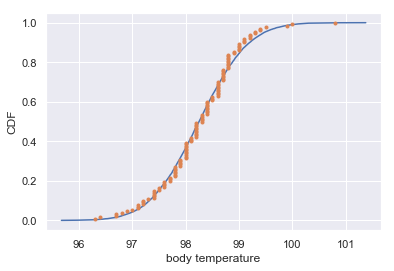

In [6]:
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma,size=10000)

# Get the CDF of the samples and of the data
x_theor,y_theor = ecdf(samples)
x,y = ecdf(df.temperature)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('body temperature')
_ = plt.ylabel('CDF')
plt.show()

The temperature is normally distributed.

### question 2

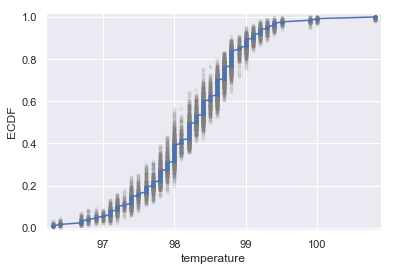

In [7]:
for bs_sample in range(100):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(df.temperature, size=len(df.temperature))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(df.temperature)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('temperature')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

The mean of the 100 bootstrapped samples still follows the normal distribution trend.

### Question 3

In [8]:
#def bootstrap_replicate_1d(data):
#    return np.random.choice(data, size=len(data))

In [9]:
def draw_bs_reps(data, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = np.random.choice(data)

    return bs_replicates

98.24923076923078
98.296


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


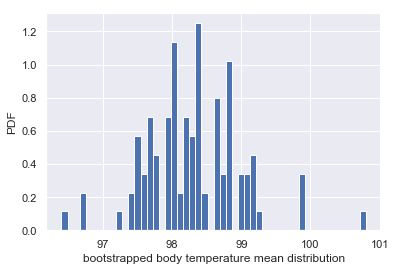

In [10]:
# Take 100 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df.temperature,100)

# Compute and print frequentist mean from original data
data_mean = np.mean(df.temperature) 
print(data_mean)

# Compute and print standard deviation of bootstrap replicates
bs_mean = np.mean(bs_replicates)
print(bs_mean)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('bootstrapped body temperature mean distribution')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Comparison of data mean and bootstraped mean very similar, so two parameter test is good, since we are comparing if these two means, so we need to use two sample test.

Because the distribution of the bootstraped data mean also has normal distribution, and the sample size is big(bigger than 30). The bootstraped samples are independent. So Z test is suitable.

In [11]:
from scipy import stats
from statsmodels.stats import weightstats as stests

In [12]:
ztest ,pval = stests.ztest(df.temperature, x2=bs_replicates, value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.6218096242660556
accept null hypothesis


In [13]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(df.temperature, bs_replicates)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 0.6222844118831254
we accept null hypothesis


### Question 4

98.24923076923078
98.14


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


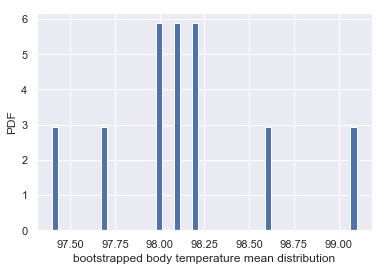

In [14]:
# Take 10 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df.temperature,10)

# Compute and print frequentist mean from original data
data_mean = np.mean(df.temperature) 
print(data_mean)

# Compute and print standard deviation of bootstrap replicates
bs_mean = np.mean(bs_replicates)
print(bs_mean)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('bootstrapped body temperature mean distribution')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [15]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(df.temperature, bs_replicates)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 0.6439708507800999
we accept null hypothesis


In [16]:
ztest ,pval = stests.ztest(df.temperature, x2=bs_replicates, value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.6432412388339643
accept null hypothesis


In the small sample exaple, t test has the same result as z test, so t test is more accurate to use in this case.

### Question 5

In [17]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [18]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(df.temperature,np.mean,10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

95% confidence interval = [98.12305769 98.37538462] games


Any temperature outside the 95% confidence interval, will be considered as abnormal. 

### Question 6

In [19]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [20]:
#split male and female temperature
df_M = df[df['gender'] == 'M']
df_F = df[df['gender'] == 'F']


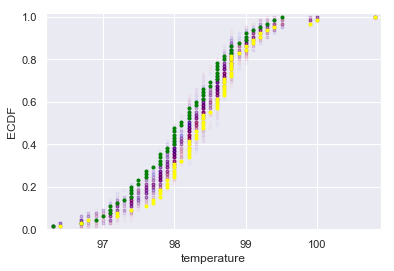

In [21]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(df_M.temperature,df_F.temperature)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(df_M.temperature)
x_2, y_2 = ecdf(df_F.temperature)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='green')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='yellow')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('temperature')
_ = plt.ylabel('ECDF')
plt.show()

The permutated data overlap with the original data, so there is no substatential diffences. 

In [22]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [23]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(df_M.temperature,df_F.temperature)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(df_M.temperature, df_F.temperature,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.9886


The statistics calculation of the permutated mean also supports the Null hypothethsis that there is no differences in body temperature for male and female.